In [1]:
import torch
from torch.autograd import grad
import torch.nn as nn
from numpy import genfromtxt
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
import pandas as pd 
import os
import re
import numpy as np

torch.manual_seed(1234)

In [2]:
cumulative_infected_list = []
cumulative_dead_list = []
cumulative_recovered_list = []

daily_infected_list = []
daily_dead_list = []
daily_recovered_list = []

fnames = os.listdir('../input/cssegisanddatacovid19/csse_covid_19_data/csse_covid_19_daily_reports')
try:
    fnames.remove('README.md')
    fnames.remove('.gitignore')
except:
    pass
#order file names
def sortkey(x):
    parts = re.split('-', x.replace(".csv", ""))
    #print(parts)
    return [int(parts[2]), int(parts[0]), int(parts[1])]

sorted_fnames = sorted(fnames, key=sortkey)

for file_name in sorted_fnames:
    df = pd.read_csv(f'../input/cssegisanddatacovid19/csse_covid_19_data/csse_covid_19_daily_reports/{file_name}')
    try:
        df = df.set_index('Country_Region')
    except:
        df = df.set_index('Country/Region')
    df.replace(np.nan, 0)
    deaths = 0 
    confirmed = 0 
    recovered = 0
    for key,row in df.iterrows():
        if key == 'Afghanistan':
            deaths = deaths + row['Deaths']
            confirmed = confirmed + row['Confirmed']
            recovered = recovered + row['Recovered']

    cumulative_infected_list.append(confirmed)
    cumulative_dead_list.append(deaths)
    cumulative_recovered_list.append(recovered)

for day in range(1,len(cumulative_infected_list)):
    daily_infected_list.append(cumulative_infected_list[day]- cumulative_infected_list[day-1])
    daily_dead_list.append(cumulative_dead_list[day]- cumulative_dead_list[day-1])
    daily_recovered_list.append(cumulative_recovered_list[day]- cumulative_recovered_list[day-1])      

In [3]:
#remove negative outliers
new_daily_recovered_list = daily_recovered_list.copy() 

for n, i in enumerate(new_daily_recovered_list):
    if i < 0:
        new_daily_recovered_list[n] = new_daily_recovered_list[n-1]

In [4]:
# remove very high outliers --> run twice -- seems like an outlier (indices 263, 264)
# max_value_idx = new_daily_recovered_list.index(max(new_daily_recovered_list))
# new_daily_recovered_list[max_value_idx] = new_daily_recovered_list[max_value_idx - 1]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


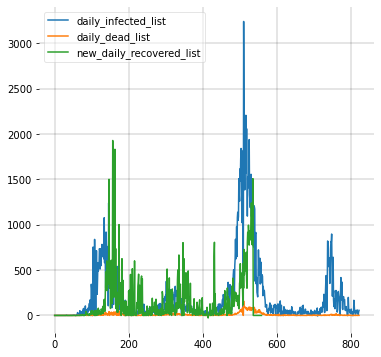

In [5]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.set_facecolor('xkcd:white')

plt.plot(daily_infected_list, label = 'daily_infected_list')
plt.plot(daily_dead_list, label = 'daily_dead_list')
plt.plot(daily_recovered_list, label = 'new_daily_recovered_list')

ax.grid(b=True, which='major', c='black', lw=0.2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show();

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


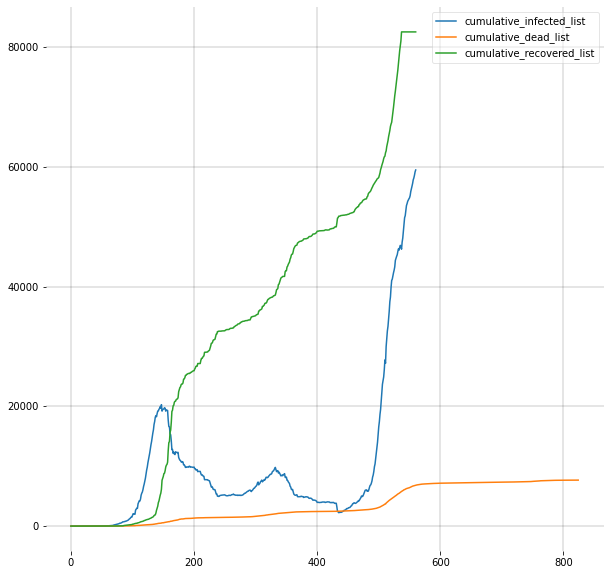

825


In [6]:
N = 40218234
cumulative_susceptible_list = []
for i in range(len(cumulative_recovered_list)):
    cumulative_infected_list[i]=(cumulative_infected_list[i] - cumulative_recovered_list[i]- cumulative_dead_list[i])
    cumulative_susceptible_list.append(N - cumulative_recovered_list[i] - cumulative_infected_list[i] - cumulative_dead_list[i])

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.set_facecolor('xkcd:white')

# plt.plot(cumulative_susceptible_list[:310], label = 'cumulative_susceptible_list')
plt.plot(cumulative_infected_list, label = 'cumulative_infected_list')
plt.plot(cumulative_dead_list, label = 'cumulative_dead_list')
plt.plot(cumulative_recovered_list, label = 'cumulative_recovered_list')

ax.grid(b=True, which='major', c='black', lw=0.2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show();
print(len(cumulative_susceptible_list))

In [7]:
#save as csv files

#cumulative cases [S,I,D,R]
df = pd.DataFrame(list(zip(cumulative_susceptible_list, cumulative_infected_list, cumulative_dead_list, cumulative_recovered_list)),
               columns =['cumulative_susceptible', 'cumulative_infected', 'cumulative_dead', 'cumulative_recovered'])
df.to_csv('covid_real_data_cumulative_cases.csv')

#daily cases [I,D,R]
df = pd.DataFrame(list(zip(daily_infected_list, daily_dead_list, new_daily_recovered_list)),
               columns =['daily_infected', 'daily_dead', 'daily_recovered'])
df.to_csv('covid_real_data_daily_cases.csv')